In [127]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [128]:
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.bsmtfinsf1+train.bsmtfinsf2+train.grlivarea)
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [129]:
#print(train.head())
#print(test.head())
#list(train)

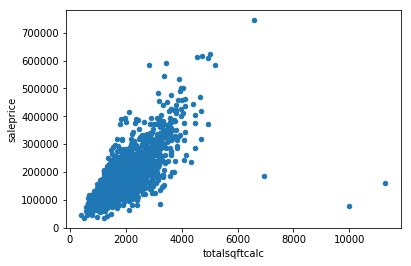

In [130]:
train.plot.scatter(y='saleprice', x='totalsqftcalc') 
#This lets me see some outliars that could be distorting the data.

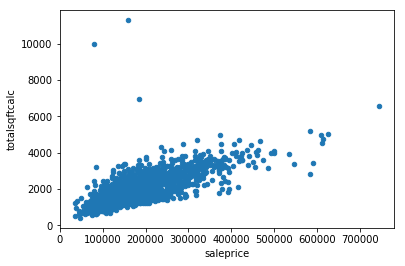

In [131]:
train.plot.scatter(y='totalsqftcalc', x='saleprice') 

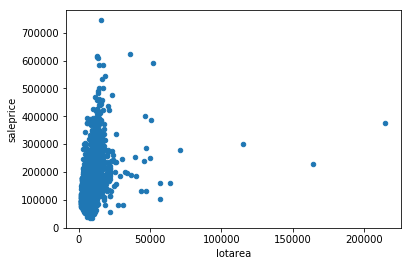

In [6]:
train.plot.scatter(y='saleprice', x='lotarea') 

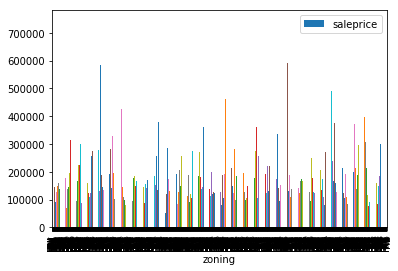

In [108]:
train.plot.bar(y='saleprice', x='zoning') 

In [7]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['salecondition'] == 'Normal']
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]
train = train[train['zoning'] != 'I']
train = train[train['zoning'] != 'C']
train = train[train['zoning'] != 'A']

In [8]:
X = train[['saleprice','qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
X1 = train[['qualityindex','totalsqftcalc','yearbuilt','lotarea','lotfrontage']].copy()
corr = X[X.columns].corr()
corr

,saleprice,qualityindex,totalsqftcalc,yearbuilt,lotarea,lotfrontage
saleprice,1.000000,0.540376,0.792214,0.547300,0.395148,0.084242
qualityindex,0.540376,1.000000,0.346798,0.092073,0.119472,0.048181
totalsqftcalc,0.792214,0.346798,1.000000,0.358158,0.376621,0.125655
yearbuilt,0.547300,0.092073,0.358158,1.000000,0.056350,0.115568
lotarea,0.395148,0.119472,0.376621,0.056350,1.000000,0.156123
lotfrontage,0.084242,0.048181,0.125655,0.115568,0.156123,1.000000


In [9]:
Y = train[['saleprice']].copy()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_top_3 = SelectKBest(score_func=chi2, k = 3)
fit = select_top_3.fit(X1,Y)
features = fit.transform(X1)
features[0:5] 

array([[ 1788., 11838., 10000.],
       [ 1837.,  8304.,    70.],
       [ 1048.,  6380.,    58.],
       [ 2409., 14803., 10000.],
       [ 2035., 11375.,    91.]])

In [11]:
model1 = smf.ols(formula='Y ~ qualityindex+totalsqftcalc+C(lotconfig)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)+C(neighborhood)', data=train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     201.2
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:24:59   Log-Likelihood:                -18951.
No. Observations:                1645   AIC:                         3.800e+04
Df Residuals:                    1594   BIC:                         3.828e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [132]:
model1_dropnom = smf.ols(formula='Y ~ qualityindex+totalsqftcalc+C(lotconfig)+yearbuilt+C(neighborhood)', data=train).fit()
print(model1_dropnom.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     245.6
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:53:05   Log-Likelihood:                -24237.
No. Observations:                2039   AIC:                         4.854e+04
Df Residuals:                    2005   BIC:                         4.873e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [119]:
predictions_1 = model1.fittedvalues
predictions_1.head()

0    218722.750219
1    168493.709057
2     98199.257331
3    177574.738456
4    140427.424768
dtype: float64

In [120]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

,index,p_saleprice
0,1,60913.178703
1,4,241555.303102
2,7,220715.644937
3,11,231745.018366
4,13,176065.351134


In [133]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_backup.csv')

In [ ]:
#dir(model2)

In [ ]:
y = np.array(train['saleprice'])
X = train[['qualityindex','totalsqftcalc','yearbuilt','yearremodel','wooddecksf','openporchsf' ]].copy()
X.head()
#model = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=3) #you will need to convert y to an array
#results = model.fit(X,y)
#scores are the F values for each variable, bigger is better
#results.scores

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train, test_size = 0.3)